In [65]:
import pandas as pd
import numpy as np
import plotly
import matplotlib.pyplot as plt

In [66]:
dataset_dir = "./"
file_covid="WHO-COVID-19-global-data.csv"
file_gps="countries_list_GPS_coordinates.csv"
df = pd.read_csv(dataset_dir+file_covid)
df_gps = pd.read_csv(dataset_dir+file_gps)


# Correct name of columns
df_ = pd.DataFrame()
for name in df.columns:
  if name[0] == ' ':
    df_.loc[:, name[1:]] = df.loc[:, name]
  else:
    df_.loc[:, name] = df[name]

df_


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-02-24,AF,Afghanistan,EMRO,5,5,0,0
1,2020-02-25,AF,Afghanistan,EMRO,0,5,0,0
2,2020-02-26,AF,Afghanistan,EMRO,0,5,0,0
3,2020-02-27,AF,Afghanistan,EMRO,0,5,0,0
4,2020-02-28,AF,Afghanistan,EMRO,0,5,0,0
...,...,...,...,...,...,...,...,...
40182,2020-09-03,ZW,Zimbabwe,AFRO,79,6638,3,206
40183,2020-09-04,ZW,Zimbabwe,AFRO,40,6678,0,206
40184,2020-09-05,ZW,Zimbabwe,AFRO,159,6837,0,206
40185,2020-09-06,ZW,Zimbabwe,AFRO,0,6837,0,206


In [97]:
# merge dataet
df_ = df_.dropna(subset=['Country_code'])
                 
for ct in df_['Country_code'].unique():
  if ct in df_gps['country'].tolist() :
    df_.loc[df_['Country_code']==ct, 'latitude'] = df_gps.loc[df_gps['country']==ct, 'latitude'].values[0]
    df_.loc[df_['Country_code']==ct, 'longitude'] = df_gps.loc[df_gps['country']==ct, 'longitude'].values[0]

# discard countries with no GPS data
df_clean  = df_.dropna(subset=['latitude', 'longitude'])
df_clean

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,latitude,longitude
0,2020-02-24,AF,Afghanistan,EMRO,5,5,0,0,33.939110,67.709953
1,2020-02-25,AF,Afghanistan,EMRO,0,5,0,0,33.939110,67.709953
2,2020-02-26,AF,Afghanistan,EMRO,0,5,0,0,33.939110,67.709953
3,2020-02-27,AF,Afghanistan,EMRO,0,5,0,0,33.939110,67.709953
4,2020-02-28,AF,Afghanistan,EMRO,0,5,0,0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...
40182,2020-09-03,ZW,Zimbabwe,AFRO,79,6638,3,206,-19.015438,29.154857
40183,2020-09-04,ZW,Zimbabwe,AFRO,40,6678,0,206,-19.015438,29.154857
40184,2020-09-05,ZW,Zimbabwe,AFRO,159,6837,0,206,-19.015438,29.154857
40185,2020-09-06,ZW,Zimbabwe,AFRO,0,6837,0,206,-19.015438,29.154857


In [98]:
print('This dataset contains {} country arround the world'.format(df_clean.Country.nunique()))

This dataset contains 208 country arround the world


In [99]:
# feat = 'New_cases'
# # select the Country from the list
# country_idx = 2
# country = list_of_countries[2]

# plt.figure(figsize=(15, 5))
# plt.plot(df_.Date_reported[df_['Country']==country], df_.loc[df_['Country']==country, 'New_cases'], label='New_cases'+' in '+country, color='tab:orange')
# plt.plot(df_.Date_reported[df_['Country']==country], df_.loc[df_['Country']==country, 'New_deaths'], label='New_deaths'+' in '+country, color='tab:red')
# plt.xticks(rotation=90)

# plt.legend()


# plt.figure(figsize=(15, 5))
# plt.plot(df_.Date_reported[df_['Country']==country], df_.loc[df_['Country']==country, 'Cumulative_deaths'], label='Cumulative_deaths'+' in '+country, color='tab:red')
# plt.plot(df_.Date_reported[df_['Country']==country], df_.loc[df_['Country']==country, 'Cumulative_cases'], label='Cumulative_cases'+' in '+country, color='tab:orange')
# plt.xticks(rotation=90)
# plt.legend()





In [100]:
df_disp = df_clean
df_disp

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,latitude,longitude
0,2020-02-24,AF,Afghanistan,EMRO,5,5,0,0,33.939110,67.709953
1,2020-02-25,AF,Afghanistan,EMRO,0,5,0,0,33.939110,67.709953
2,2020-02-26,AF,Afghanistan,EMRO,0,5,0,0,33.939110,67.709953
3,2020-02-27,AF,Afghanistan,EMRO,0,5,0,0,33.939110,67.709953
4,2020-02-28,AF,Afghanistan,EMRO,0,5,0,0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...
40182,2020-09-03,ZW,Zimbabwe,AFRO,79,6638,3,206,-19.015438,29.154857
40183,2020-09-04,ZW,Zimbabwe,AFRO,40,6678,0,206,-19.015438,29.154857
40184,2020-09-05,ZW,Zimbabwe,AFRO,159,6837,0,206,-19.015438,29.154857
40185,2020-09-06,ZW,Zimbabwe,AFRO,0,6837,0,206,-19.015438,29.154857


In [154]:
# connect mapbox API
import pydeck as pdk

%env MAPBOX_API_KEY=pk.eyJ1IjoiYW1pbmVoeSIsImEiOiJja2NrZG1yZWYxdWRzMnJtMjhrMHJueWx4In0.OdhDYybAfg0qZ69IQHpFQQ


layer = pdk.Layer("ScatterplotLayer",
            data=df_disp, 
            pickable=True, 
            opacity=0.6, 
            stroked=True,
            filled=True,
            radius_scale=4, 
            radius_min_pixels=2, 
            radius_max_pixels=150,
            line_width_min_pixels=1, 
            get_position=['longitude', 'latitude'], 
            get_radius="New_cases")
#             get_fill_color=pd.DataFrame(np.random.randint(0, 255, [df_disp.shape[0],3]).tolist(), index=df_disp.index),
#             get_line_color=pd.DataFrame(np.random.randint(0, 255, [df_disp.shape[0],3]).tolist(), index=df_disp.index))


viewport = pdk.data_utils.compute_view(
    points=df_disp.loc[:, ['longitude', 'latitude']], 
    view_proportion=0.9)

r = pdk.Deck(layers=[layer], 
             initial_view_state=viewport,
             tooltip={"text": "Country: {Country}\n"
                    "Latitude: {latitude} \n"
                    "Longitude: {longitude}"},
             map_style="mapbox://styles/mapbox/light-v9")
r.show()


env: MAPBOX_API_KEY=pk.eyJ1IjoiYW1pbmVoeSIsImEiOiJja2NrZG1yZWYxdWRzMnJtMjhrMHJueWx4In0.OdhDYybAfg0qZ69IQHpFQQ


DeckGLWidget(google_maps_key=None, json_input='{"initialViewState": {"latitude": 21.11206914960634, "longitude…

<BarContainer object of 38742 artists>

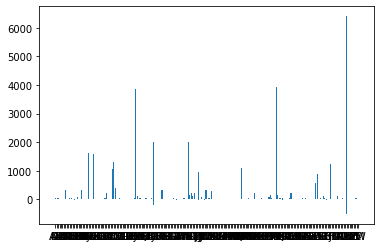

In [156]:



plt.figure(figsize(10,10))
plt.bar(df_clean.Country_code.unique(), df_clean[])

In [168]:
df_clean.loc[df_clean.Country_code==df_clean.Country_code.unique()[2], 'Date_reported']

381    2020-02-25
382    2020-02-26
383    2020-02-27
384    2020-02-28
385    2020-02-29
          ...    
572    2020-09-03
573    2020-09-04
574    2020-09-05
575    2020-09-06
576    2020-09-07
Name: Date_reported, Length: 196, dtype: object